# Stable Diffusion Inference & Generation Control (Local Version)

This notebook has been adapted for local execution, supporting both CPU and CUDA (GPU) devices.

In [7]:
import os
import torch
from diffusers import DiffusionPipeline
import matplotlib.pyplot as plt
from PIL import Image
from contextlib import nullcontext

# Device Configuration
if torch.cuda.is_available():
    device = "cuda"
    dtype = torch.float16
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = "cpu"
    dtype = torch.float32
    print("Using CPU. Note: Generation will be slow.")

model_path = "./sd15_local"
model_id = "runwayml/stable-diffusion-v1-5"

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Using GPU: Tesla T4


In [8]:
# Load or Download Model
if not os.path.exists(model_path):
    print(f"Downloading model '{model_id}' ...")
    pipe = DiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=dtype
    )
    pipe.save_pretrained(model_path)
    print(f"Model saved to {model_path}")
else:
    print(f"Loading model from {model_path} ...")
    pipe = DiffusionPipeline.from_pretrained(
        model_path,
        torch_dtype=dtype
    )

pipe = pipe.to(device)
print("Stable Diffusion ready \ud83d\ude80")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Model saved to ./sd15_local


ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py", line 104, in json_packer
    ).encode("utf8", errors="surrogateescape")
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'utf-8' codec can't encode characters in position 51-52: surrogates not allowed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/zmq/eventloop/zmqstream.py", line 551, in _run_callback
    f = callback(*args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/iostream.py", line 120, in _handle_event
    event_f()
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/iostream.py", line 518, in _flush
    self.session.send(
  File "/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py", line 848, in send
    to_s

In [2]:
!pip uninstall -y torch torchvision torchaudio diffusers transformers accelerate
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install diffusers transformers accelerate safetensors

Found existing installation: torch 2.9.0+cu126
Uninstalling torch-2.9.0+cu126:
  Successfully uninstalled torch-2.9.0+cu126
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126
Found existing installation: diffusers 0.36.0
Uninstalling diffusers-0.36.0:
  Successfully uninstalled diffusers-0.36.0
Found existing installation: transformers 5.0.0
Uninstalling transformers-5.0.0:
  Successfully uninstalled transformers-5.0.0
Found existing installation: accelerate 1.12.0
Uninstalling accelerate-1.12.0:
  Successfully uninstalled accelerate-1.12.0
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 67.3 MB/s eta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 62.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 97.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 35.6 MB/s eta 0:00:00


In [9]:
import os
from diffusers import DiffusionPipeline
import torch
model_path = "/sd15_local"

pipe = DiffusionPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

print("Stable Diffusion ready 🚀")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

Stable Diffusion ready 🚀


In [10]:
import torch
from contextlib import nullcontext

device = "cuda" if torch.cuda.is_available() else "cpu"

def generate_image(pipe, prompt, seed=None, negative_prompt=None, steps=25, cfg=7.5):
    if seed is None:
        seed = torch.seed()
    
    # Use a fixed generator for reproducible results if seed is provided
    generator = torch.Generator(device=device).manual_seed(seed)
    
    # Autocast only for CUDA
    amp_ctx = torch.autocast("cuda") if device == "cuda" else nullcontext()

    with torch.inference_mode(), amp_ctx:
        result = pipe(
            prompt=prompt,
            negative_prompt=negative_prompt,
            num_inference_steps=steps,
            guidance_scale=cfg,
            generator=generator,
        )
    return result.images[0]

def show_two_images(img1, title1, img2, title2):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title(title1)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title(title2)
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

In [4]:
import matplotlib.pyplot as plt

def show_two_images(img1, title1, img2, title2):
    plt.figure(figsize=(10,5))

    # Image 1
    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.title(title1, fontsize=12)
    plt.axis("off")

    # Image 2
    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.title(title2, fontsize=12)
    plt.axis("off")

    plt.tight_layout()
    plt.show()




## 1: Comparison: Randomness (No Seed)

**Left Image:** Generated without specifying a seed  
**Right Image:** Generated again without specifying a seed  

**Observation:**  
The images differ because each run starts from a new random noise pattern.

**Conclusion:**  
Removing the seed introduces variability in the generated outputs.


Generating two images with the same prompt but without a fixed seed results in different images.

Generating image 1...


  0%|          | 0/25 [00:00<?, ?it/s]

Generating image 2...


  0%|          | 0/25 [00:00<?, ?it/s]

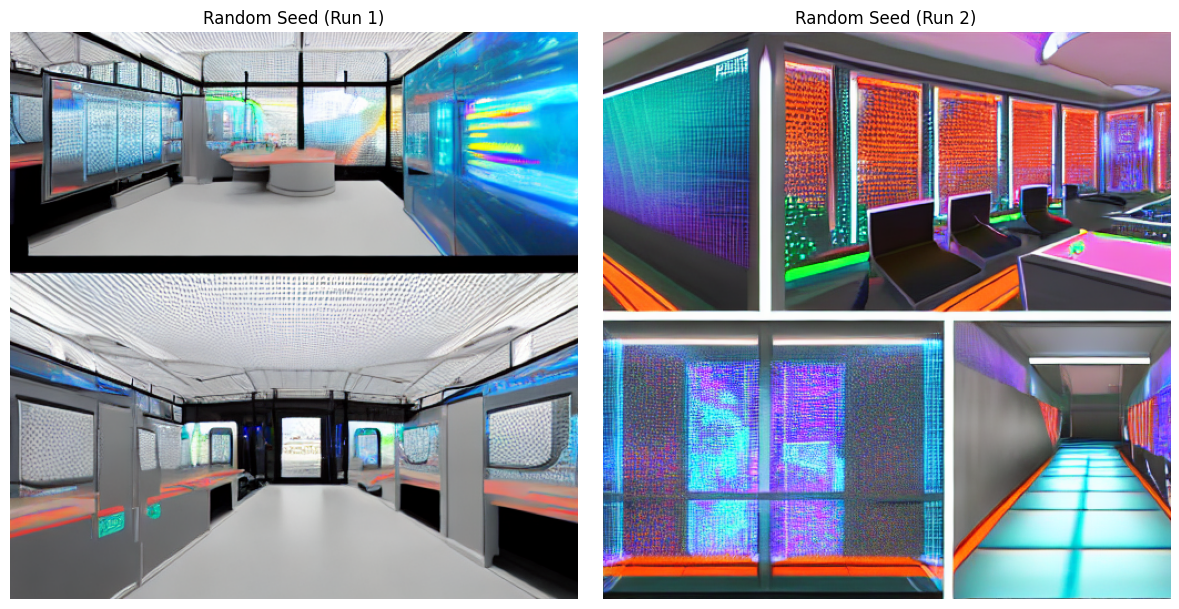

In [11]:
prompt = "A futuristic AI lab, holographic screens, ultra detailed"

print("Generating image 1...")
img1 = generate_image(pipe, prompt)
print("Generating image 2...")
img2 = generate_image(pipe, prompt)

show_two_images(img1, "Random Seed (Run 1)", img2, "Random Seed (Run 2)")


## 2: Comparison: Reproducibility (Seed Control)

**Left Image:** Generated using a fixed seed (Seed = 123)  
**Right Image:** Generated again with the same seed  

**Observation:**  
Both images are identical because the model starts from the same initial noise pattern.

**Conclusion:**  
Fixing the seed ensures reproducible and repeatable results.


Providing the same seed ensures the exact same image is generated.

Generating image 1 with fixed seed...


  0%|          | 0/25 [00:00<?, ?it/s]

Generating image 2 with fixed seed...


  0%|          | 0/25 [00:00<?, ?it/s]

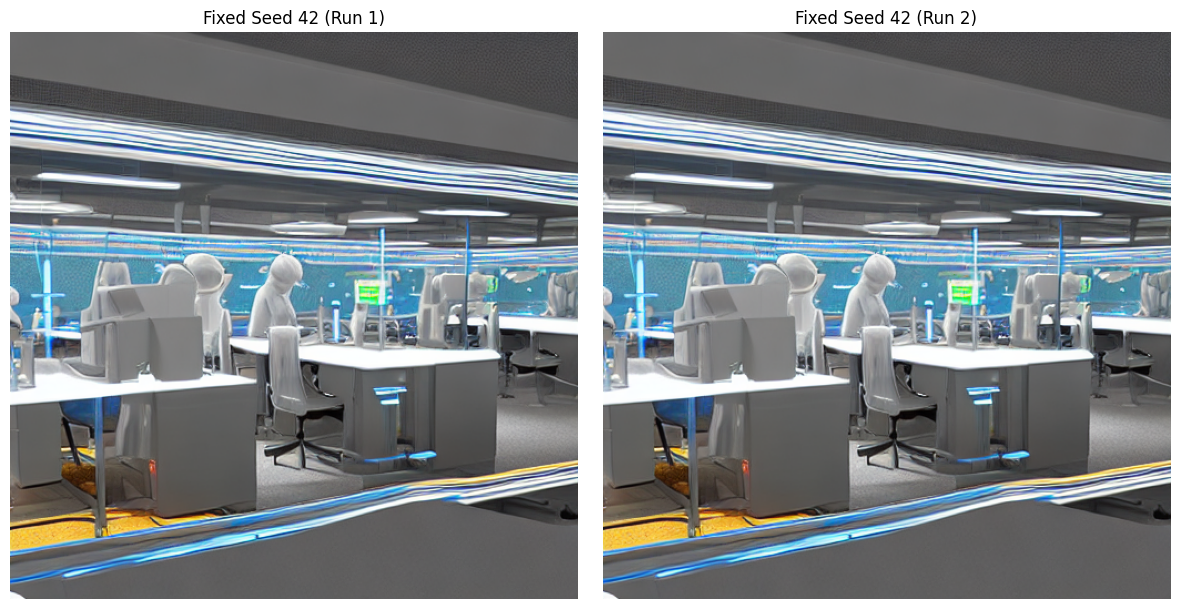

In [12]:
seed = 42

print("Generating image 1 with fixed seed...")
img3 = generate_image(pipe, prompt, seed=seed)
print("Generating image 2 with fixed seed...")
img4 = generate_image(pipe, prompt, seed=seed)

show_two_images(img3, f"Fixed Seed {seed} (Run 1)", img4, f"Fixed Seed {seed} (Run 2)")


## 3: Comparison: Inference Steps

**Left Image:** 10 inference steps  
**Right Image:** 40 inference steps  

**Observation:**  
The right image shows sharper details and cleaner structure.

**Conclusion:**  
Increasing inference steps improves image refinement, but increases generation time.


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

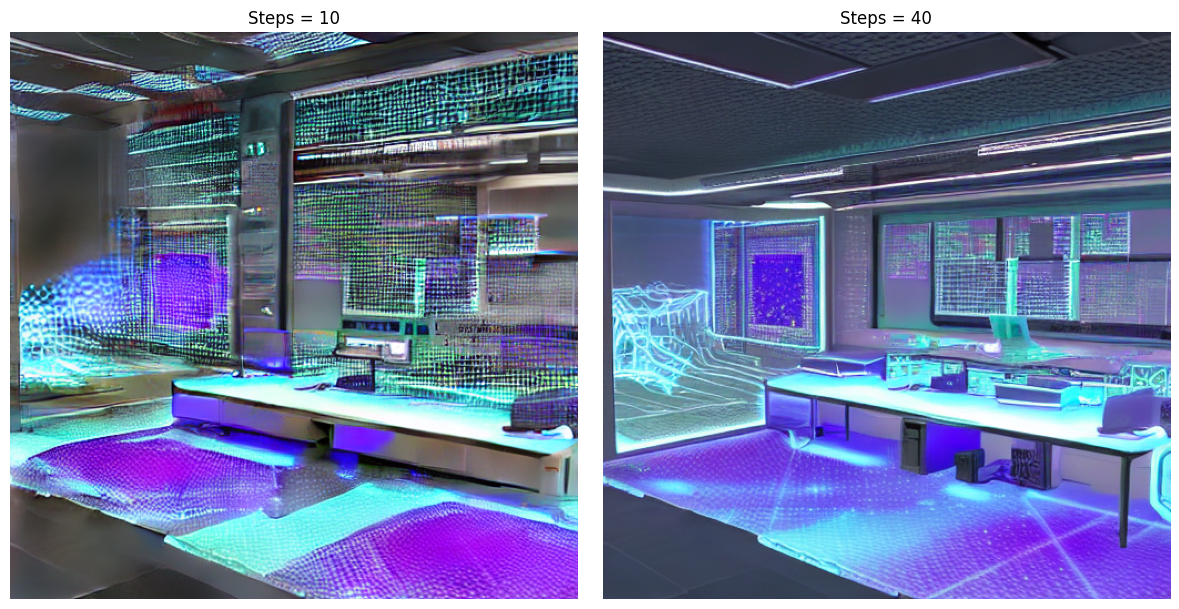

In [13]:
img_low  = generate_image(pipe, prompt, seed=123, steps=10)
img_high = generate_image(pipe, prompt, seed=123, steps=40)

show_two_images(img_low, "Steps = 10",
                img_high, "Steps = 40")



## 4: Comparison: Guidance Scale (CFG)

**Left Image:** CFG = 3  
**Right Image:** CFG = 12  

**Observation:**  
The right image follows the prompt more strictly, while the left image shows more creative variation.

**Conclusion:**  
Higher CFG enforces stronger adherence to the prompt.

CFG scale controls how closely the model follows the prompt.

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

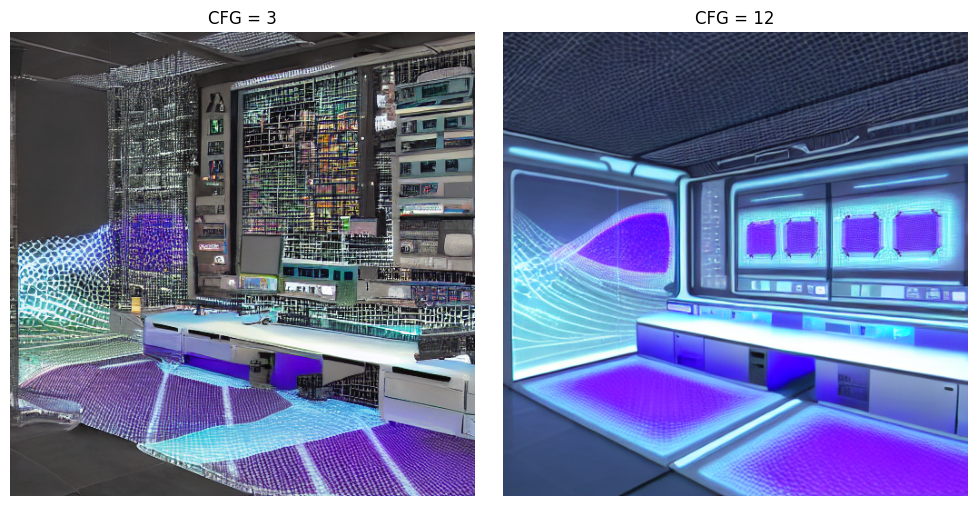

In [ ]:
img_low_cfg  = generate_image(pipe, prompt, seed=123, cfg=3)
img_high_cfg = generate_image(pipe, prompt, seed=123, cfg=12)

show_two_images(img_low_cfg, "CFG = 3",
                img_high_cfg, "CFG = 12")


Generating with CFG=2.0 (Lower guidance)...


  0%|          | 0/25 [00:00<?, ?it/s]

Generating with CFG=15.0 (Higher guidance)...


  0%|          | 0/25 [00:00<?, ?it/s]

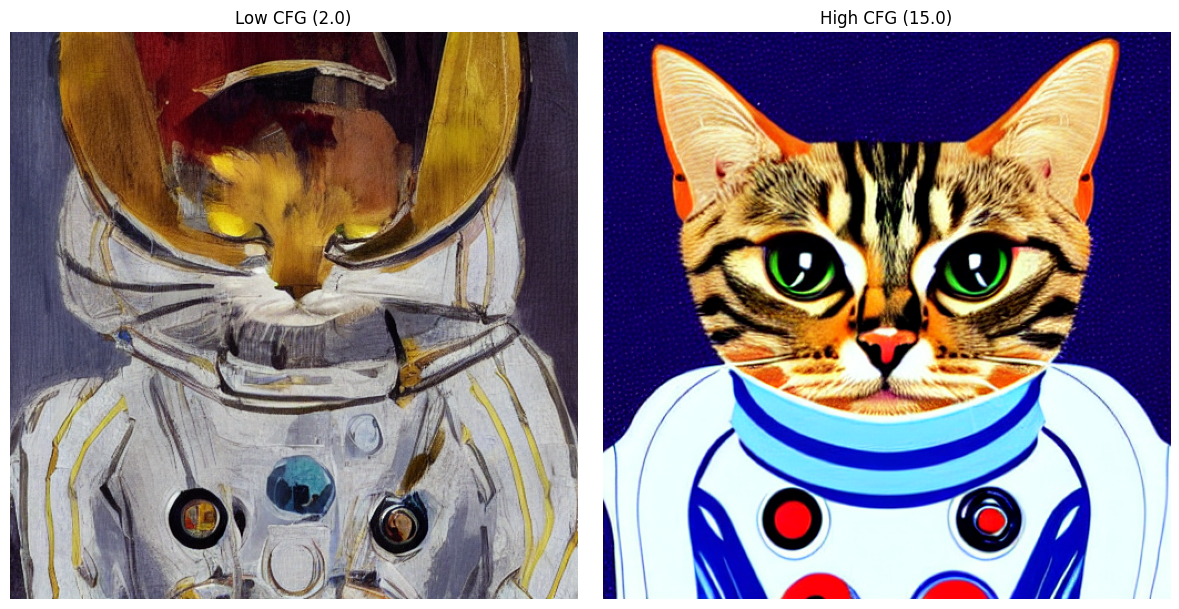

In [15]:
prompt_cat = "A cute cat wearing a space suit, digital art"
seed = 777

print("Generating with CFG=2.0 (Lower guidance)...")
img7 = generate_image(pipe, prompt_cat, seed=seed, cfg=2.0)
print("Generating with CFG=15.0 (Higher guidance)...")
img8 = generate_image(pipe, prompt_cat, seed=seed, cfg=15.0)

show_two_images(img7, "Low CFG (2.0)", img8, "High CFG (15.0)")

## 3. Influence of Negative Prompts

Negative prompts allow you to specify what you *don't* want to see in the image.

Generating image without negative prompt...


  0%|          | 0/25 [00:00<?, ?it/s]

Generating image with negative prompt...


  0%|          | 0/25 [00:00<?, ?it/s]

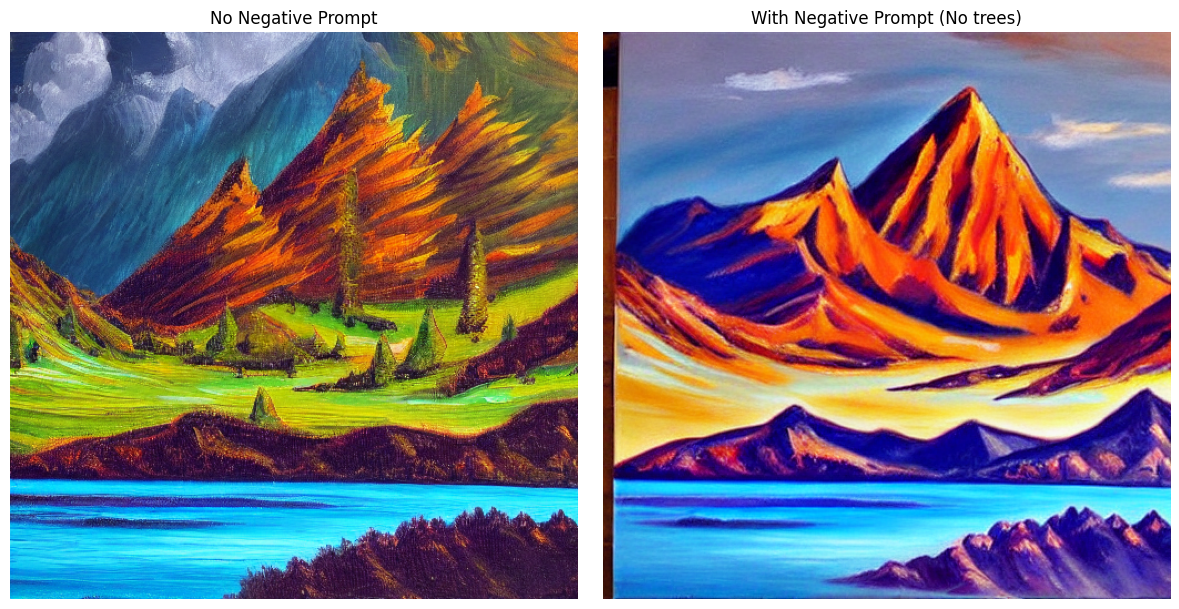

In [14]:
prompt_nature = "A beautiful mountain landscape with a clear lake, oil painting style"
neg_prompt = "trees, forest, green color"
seed = 123

print("Generating image without negative prompt...")
img5 = generate_image(pipe, prompt_nature, seed=seed)
print("Generating image with negative prompt...")
img6 = generate_image(pipe, prompt_nature, seed=seed, negative_prompt=neg_prompt)

show_two_images(img5, "No Negative Prompt", img6, "With Negative Prompt (No trees)")


## Final Takeaway

- **Seed** controls reproducibility  
- **Inference Steps** control refinement quality  
- **CFG Scale** controls prompt faithfulness  